In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\Admin\Downloads\Analytics Vidya Hackathon (Feb 2021)\train_data.csv")
data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [3]:
data.shape

(50882, 14)

In [4]:
data.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [6]:
# Dropping the ID column

In [7]:
data = data.drop(columns=["ID"],axis=1)

In [8]:
data.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


## Exploratory Data Analysis

In [9]:
# Checking the null values in the dataset

In [10]:
data.isna().sum()

City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [11]:
# 'Health Indicator','Holding_Policy_Duration' and 'Holding_Policy_Type' columns have many missing values

In [12]:
# Checking the null values in the dataset interms of percentage

In [13]:
features_na = [feature for feature in data.columns if data[feature].isnull().sum()>1]

In [14]:
print('\033[1m'+ "Missing values in each variable,"+ "\033[0m")
for feature in features_na:
    percentage = (np.round(data[feature].isnull().mean(), 4)*100)
    print(feature," - " "%.2f" % percentage,"%")

Missing values in each variable,
Health Indicator  - 22.98 %
Holding_Policy_Duration  - 39.80 %
Holding_Policy_Type  - 39.80 %


### Numerical variables in the data

In [15]:
numerical_features=[feature for feature in data.columns if len(data[feature].unique())>25 and data[feature].dtypes != "O"] 
print("Number of numerical features:", len(numerical_features))

Number of numerical features: 4


In [16]:
data[numerical_features].head()

,Region_Code,Upper_Age,Lower_Age,Reco_Policy_Premium
0,3213,36,36,11628.0
1,1117,75,22,30510.0
2,3732,32,32,7450.0
3,4378,52,48,17780.0
4,2190,44,44,10404.0


###  Univariate analysis

In [17]:
# Using histograms to analyze the distribution of numerical features

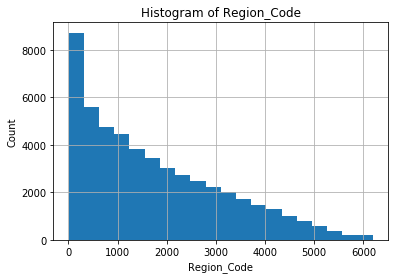

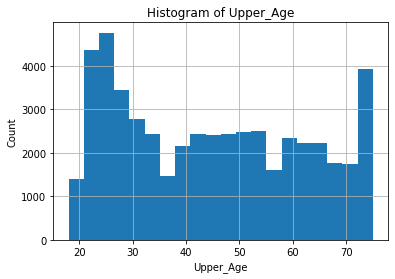

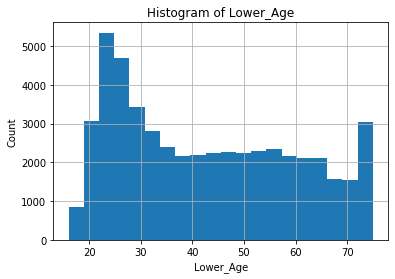

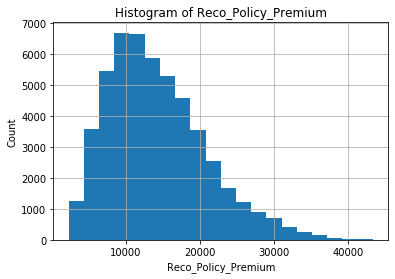

In [18]:
for feature in numerical_features:
    dataset = data.copy()
    dataset[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title("Histogram of "+ feature)
    plt.show()

#### The distribution of data is not normal in all the numerical features

In [19]:
# Using the boxplots to identify the outliers in the dataset

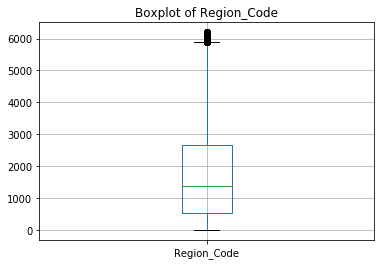

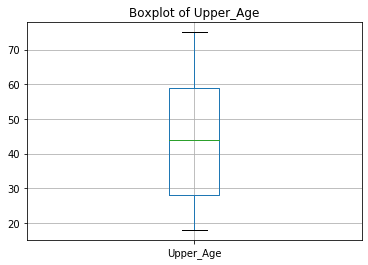

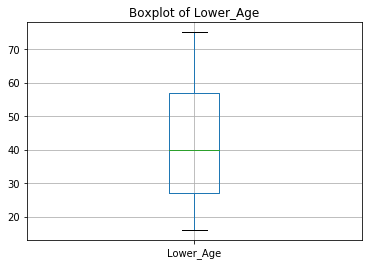

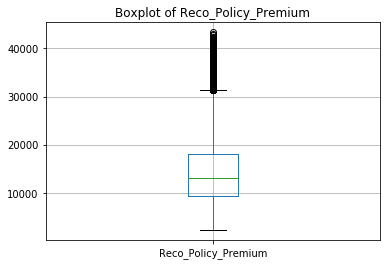

In [20]:
for feature in numerical_features:
    dataset = data.copy()
    dataset.boxplot(column=feature)
    plt.title("Boxplot of "+ feature)
    plt.show()

#### There are many outliers in the 'Reco_Policy_Premium' feature

In [21]:
# Quantile calculations

In [22]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1

In [23]:
# Number of extreme outliers in each variable

In [24]:
((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).sum()

Accomodation_Type              0
City_Code                      0
Health Indicator               0
Holding_Policy_Duration        0
Holding_Policy_Type            0
Is_Spouse                      0
Lower_Age                      0
Reco_Insurance_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium          821
Region_Code                  201
Response                   12209
Upper_Age                      0
dtype: int64

In [25]:
IQR = dataset['Reco_Policy_Premium'].quantile(0.75)-dataset['Reco_Policy_Premium'].quantile(0.25)
lower_bridge=dataset['Reco_Policy_Premium'].quantile(0.25)-(IQR*1.5)
upper_bridge=dataset['Reco_Policy_Premium'].quantile(0.75)+(IQR*1.5)
print(feature, lower_bridge), print(feature,upper_bridge)

Reco_Policy_Premium -4024.0
Reco_Policy_Premium 31368.0


(None, None)

In [26]:
dataset.loc[dataset['Reco_Policy_Premium']> upper_bridge]=upper_bridge

### Bivariate analysis

In [27]:
# Using boxplots to represent indepedent numerical variables with the output variable 

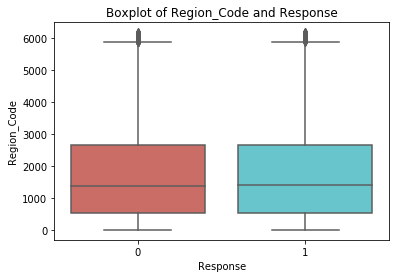

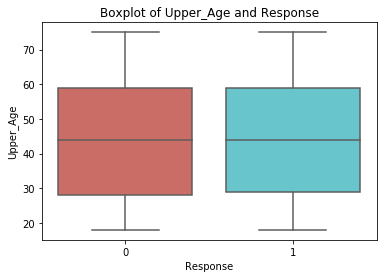

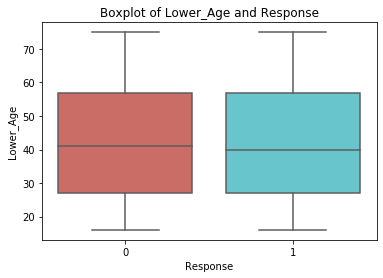

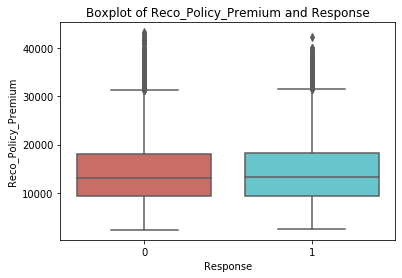

In [28]:
for feature in numerical_features:
    sns.boxplot("Response", feature, data=data, palette='hls')
    plt.title("Boxplot of "+ feature +" and Response")
    plt.show()

In [29]:
# Countplot of dependent variable

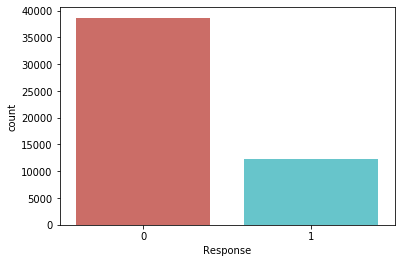

In [30]:
sns.countplot("Response", data=data, palette="hls")

In [31]:
data["Response"].value_counts()

0    38673
1    12209
Name: Response, dtype: int64

In [32]:
data["Response"].unique()

array([0, 1], dtype=int64)

In [33]:
print(sum(data["Response"]== 1)/sum(data["Response"]== 0)*100, "% not interested responses")
print(100 - sum(data["Response"]==1)/sum(data["Response"]== 0)*100, "% interested responses")

31.569829079719703 % not interested responses
68.43017092028029 % interested responses


### Categorical variables

In [34]:
categorical_features = [feature for feature in data.columns if data[feature].dtype == "O"]
print("Number of categorical variables :", len(categorical_features))

Number of categorical variables : 6


In [35]:
dataset[categorical_features].head()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration
0,C3,Rented,Individual,No,X1,14+
1,C5,Owned,Joint,No,X2,NaN
2,C5,Owned,Individual,No,NaN,1.0
3,C24,Owned,Joint,No,X1,14+
4,C8,Rented,Individual,No,X2,3.0


In [36]:
# Checking the number of unique values in each variable

In [37]:
data[categorical_features].nunique()

City_Code                  36
Accomodation_Type           2
Reco_Insurance_Type         2
Is_Spouse                   2
Health Indicator            9
Holding_Policy_Duration    15
dtype: int64

### Univariate analysis of categorical variables

In [38]:
# Using countplots see the frequencies of each categotical values

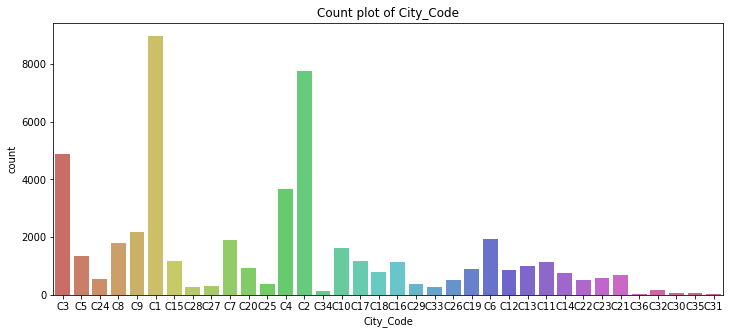

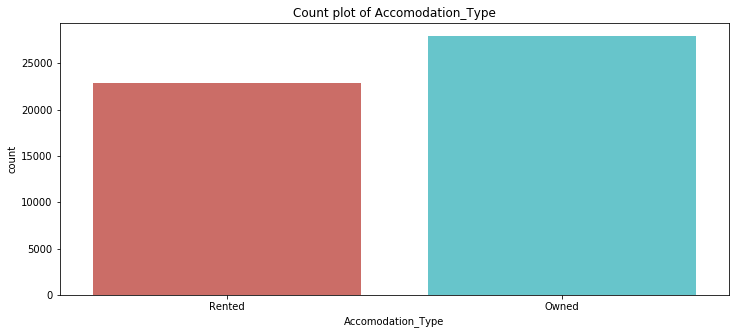

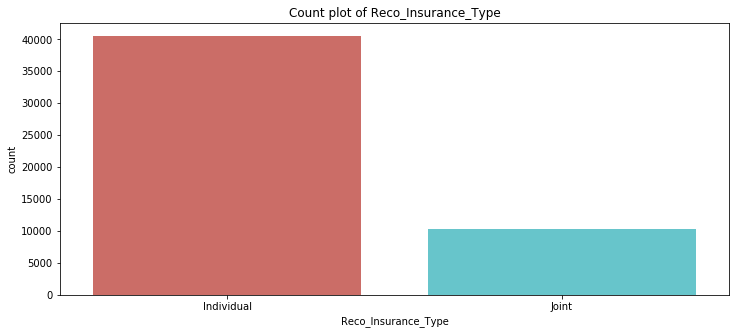

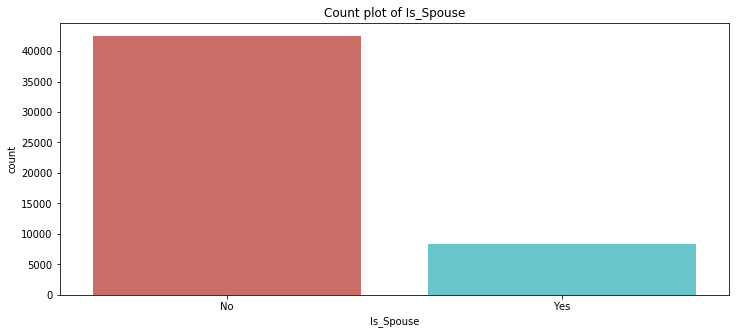

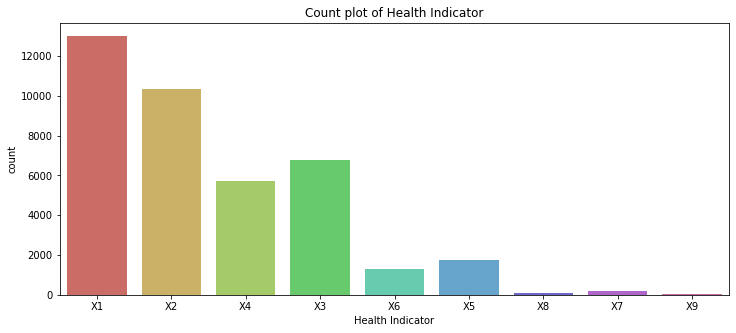

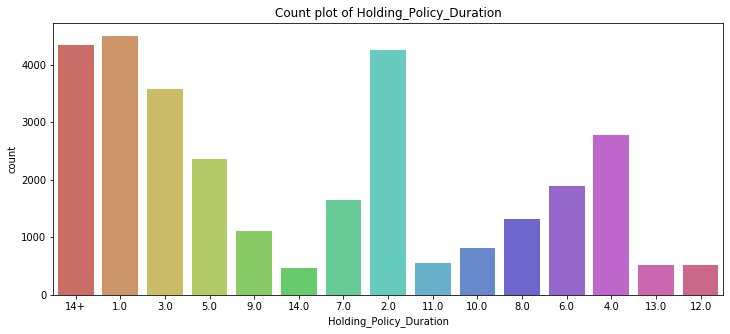

In [39]:
for feature in categorical_features:
    plt.figure(figsize = (12,5))
    dataset = data.copy()
    sns.countplot(feature, data = data, palette = 'hls')
    plt.title("Count plot of " + feature)
    plt.show()

### BI-variate analysis

In [40]:
# Cross-tabulation of independent varibales with respect to dependent variable

<Figure size 864x360 with 0 Axes>

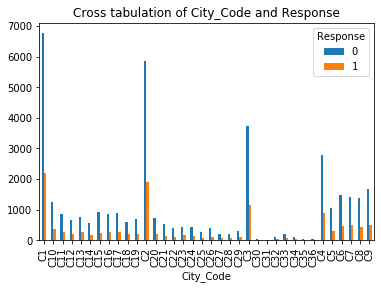

<Figure size 864x360 with 0 Axes>

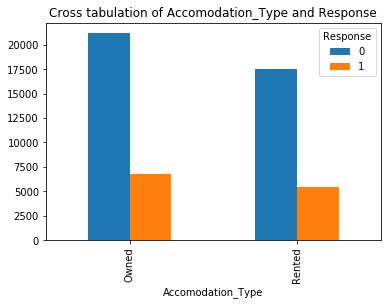

<Figure size 864x360 with 0 Axes>

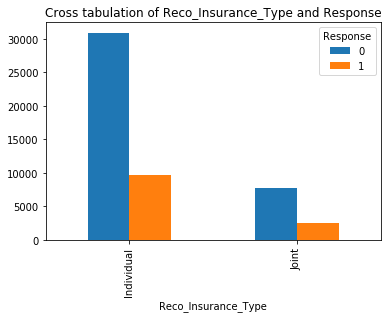

<Figure size 864x360 with 0 Axes>

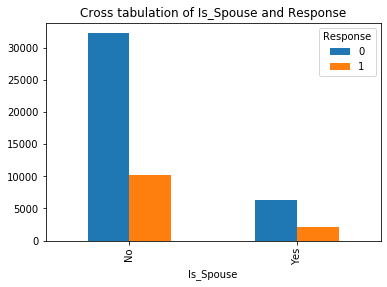

<Figure size 864x360 with 0 Axes>

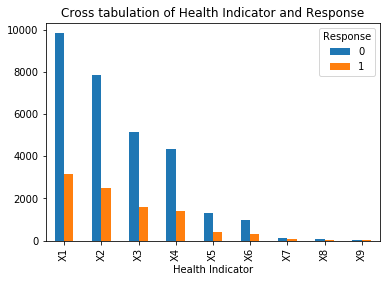

<Figure size 864x360 with 0 Axes>

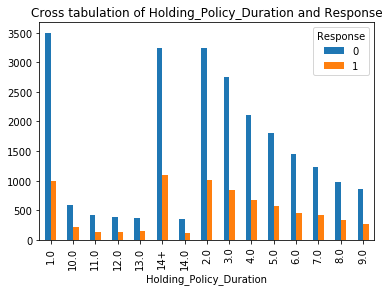

In [41]:
for feature in categorical_features:
    plt.figure(figsize = (12,5))
    pd.crosstab(data[feature], data["Response"]).plot(kind="bar")
    plt.title("Cross tabulation of " + feature + " and Response")
    plt.show()

## Feature Engineering

In [42]:
correlation = data.corr()

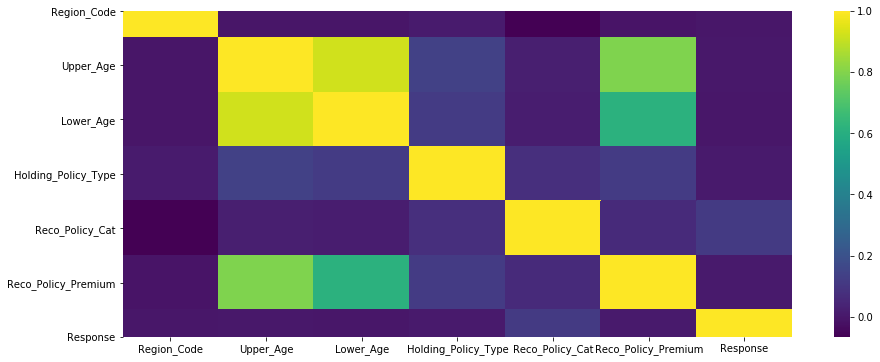

In [43]:
plt.figure(figsize = (15,6))
sns.heatmap(correlation, cbar = True, cmap = "viridis")

In [44]:
data.columns

Index(['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Upper_Age', 'Lower_Age', 'Is_Spouse', 'Health Indicator',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [45]:
data["Upper_Age"].corr(data["Lower_Age"])

0.9213922158232755

In [46]:
data["Upper_Age"].corr(data["Reco_Policy_Premium"])

0.792689117800555

In [47]:
data["Lower_Age"].corr(data["Reco_Policy_Premium"])

0.6157385261425684

#### There is a high correlation between 'Upper_Age' and 'Lower_Age', hence dropping 'Lower_Age' from the dataset

In [48]:
data = data.drop(columns=["Lower_Age"], axis =1)

In [49]:
data.shape

(50882, 12)

### Handling the missing values

In [50]:
data.isna().sum()

City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [51]:
# Categorical variables missing values imputation

In [52]:
data["Health Indicator"].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [53]:
data["Health Indicator"].fillna("X10", inplace = True)

In [54]:
# Holding_Policy_Duration

In [55]:
data["Holding_Policy_Duration"].value_counts()

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [56]:
data["Holding_Policy_Duration"].fillna("15.0", inplace = True)

In [57]:
data["Holding_Policy_Type"].value_counts()

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

In [58]:
data["Holding_Policy_Type"].fillna(5.0, inplace = True)

In [59]:
data.isna().sum()

City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

#### All the missing values have been imputed

### Encoding of categorial variables

In [60]:
from numpy import asarray

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
encoder = LabelEncoder()

In [63]:
# Holding_Policy_Duration

In [64]:
hpd = asarray(data['Holding_Policy_Duration'])

In [65]:
# transform data
hpd = encoder.fit_transform(hpd)

In [66]:
data['Holding_Policy_Duration'] = hpd

In [67]:
# Encoding other categorical variables

In [68]:
data.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,3213,Rented,Individual,36,No,X1,5,3.0,22,11628.0,0
1,C5,1117,Owned,Joint,75,No,X2,7,5.0,22,30510.0,0
2,C5,3732,Owned,Individual,32,No,X10,0,1.0,19,7450.0,1
3,C24,4378,Owned,Joint,52,No,X1,5,3.0,19,17780.0,0
4,C8,2190,Rented,Individual,44,No,X2,9,1.0,16,10404.0,0


In [69]:
dataset = pd.get_dummies(data, columns=["City_Code",'Health Indicator','Holding_Policy_Type','Accomodation_Type', 'Reco_Insurance_Type','Is_Spouse'], drop_first=True)

In [70]:
dataset.head()

,Region_Code,Upper_Age,Holding_Policy_Duration,Reco_Policy_Cat,Reco_Policy_Premium,Response,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,...,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0,Holding_Policy_Type_5.0,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Is_Spouse_Yes
0,3213,36,5,22,11628.0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1117,75,7,22,30510.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,3732,32,0,19,7450.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4378,52,5,19,17780.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,2190,44,9,16,10404.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [71]:
dataset.shape

(50882, 57)

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler=MinMaxScaler()
scaler.fit(dataset)

MinMaxScaler()

In [74]:
scaled_data = pd.DataFrame(scaler.transform(dataset),columns=dataset.columns)

In [75]:
scaled_data.head()

,Region_Code,Upper_Age,Holding_Policy_Duration,Reco_Policy_Cat,Reco_Policy_Premium,Response,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,...,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0,Holding_Policy_Type_5.0,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Is_Spouse_Yes
0,0.518650,0.315789,0.333333,1.000000,0.227609,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.180203,1.000000,0.466667,1.000000,0.687356,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.602454,0.245614,0.000000,0.857143,0.125881,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.706766,0.596491,0.333333,0.857143,0.377401,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.353464,0.456140,0.600000,0.714286,0.197807,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Importing and applying same preprocessing to test data

In [76]:
data_test = pd.read_csv(r"C:\Users\Admin\Downloads\Analytics Vidya Hackathon (Feb 2021)\test_data.csv")
data_test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [77]:
data_test.shape

(21805, 13)

In [78]:
# Quantile calculations

In [79]:
Q1 = data_test.quantile(0.25)
Q3 = data_test.quantile(0.75)
IQR = Q3 - Q1

In [80]:
# Number of extreme outliers in each variable

In [81]:
((data_test < (Q1 - 1.5 * IQR)) | (data_test > (Q3 + 1.5 * IQR))).sum()

Accomodation_Type            0
City_Code                    0
Health Indicator             0
Holding_Policy_Duration      0
Holding_Policy_Type          0
ID                           0
Is_Spouse                    0
Lower_Age                    0
Reco_Insurance_Type          0
Reco_Policy_Cat              0
Reco_Policy_Premium        291
Region_Code                 58
Upper_Age                    0
dtype: int64

In [82]:
IQR = data_test['Reco_Policy_Premium'].quantile(0.75)-data_test['Reco_Policy_Premium'].quantile(0.25)
lower_bridge=data_test['Reco_Policy_Premium'].quantile(0.25)-(IQR*1.5)
upper_bridge=data_test['Reco_Policy_Premium'].quantile(0.75)+(IQR*1.5)
print(feature, lower_bridge), print(feature,upper_bridge)

Holding_Policy_Duration -4089.899999999998
Holding_Policy_Duration 31576.499999999996


(None, None)

In [83]:
data_test['Reco_Policy_Premium'].loc[data_test['Reco_Policy_Premium']> upper_bridge]=upper_bridge

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [84]:
data_test = data_test.drop(columns=["ID"], axis=1)

In [85]:
data_test = data_test.drop(columns=["Lower_Age"], axis =1)

In [86]:
# Categorical variables missing values imputation

In [87]:
data_test["Health Indicator"].value_counts()

X1    5614
X2    4516
X3    2846
X4    2442
X5     681
X6     514
X7      96
X8      41
X9      28
Name: Health Indicator, dtype: int64

In [88]:
data_test["Health Indicator"].fillna("X10", inplace = True)

In [89]:
# Holding_Policy_Duration

In [90]:
data_test["Holding_Policy_Duration"].value_counts()

14+     1892
1.0     1891
2.0     1772
3.0     1606
4.0     1205
5.0      992
6.0      903
7.0      664
8.0      569
9.0      493
10.0     333
11.0     254
13.0     221
14.0     211
12.0     196
Name: Holding_Policy_Duration, dtype: int64

In [91]:
data_test["Holding_Policy_Duration"].fillna("15.0", inplace = True)

In [92]:
data_test["Holding_Policy_Type"].value_counts()

3.0    5572
1.0    3574
2.0    2150
4.0    1906
Name: Holding_Policy_Type, dtype: int64

In [93]:
data_test["Holding_Policy_Type"].fillna(5.0, inplace = True)

In [94]:
data_test.isna().sum()

City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

#### All the missing values have been imputed

### Encoding of categorial variables

In [95]:
encoder = LabelEncoder()

In [96]:
# Holding_Policy_Duration

In [97]:
hpd = asarray(data_test['Holding_Policy_Duration'])

In [98]:
# transform data
hpd = encoder.fit_transform(hpd)

In [99]:
data_test['Holding_Policy_Duration'] = hpd

In [100]:
# Encoding other categorical variables

In [101]:
data_test.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,C1,156,Owned,Individual,30,No,X10,12,3.0,5,11934.0
1,C4,7,Owned,Joint,69,Yes,X1,9,3.0,18,31576.5
2,C1,564,Rented,Individual,28,No,X3,8,4.0,17,9240.0
3,C3,1177,Rented,Individual,23,No,X3,9,3.0,18,9086.0
4,C1,951,Owned,Individual,75,No,X3,7,5.0,5,22534.0


In [102]:
dataset_test = pd.get_dummies(data_test, columns=["City_Code",'Health Indicator','Holding_Policy_Type','Accomodation_Type', 'Reco_Insurance_Type','Is_Spouse'], drop_first=True)

In [103]:
dataset_test.head()

,Region_Code,Upper_Age,Holding_Policy_Duration,Reco_Policy_Cat,Reco_Policy_Premium,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,...,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0,Holding_Policy_Type_5.0,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Is_Spouse_Yes
0,156,30,12,5,11934.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,7,69,9,18,31576.5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
2,564,28,8,17,9240.0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,1177,23,9,18,9086.0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,951,75,7,5,22534.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [104]:
dataset_test.shape

(21805, 56)

In [105]:
scaler=MinMaxScaler()
scaler.fit(dataset_test)

MinMaxScaler()

In [106]:
scaled_test_data = pd.DataFrame(scaler.transform(dataset_test),columns=dataset_test.columns)

In [107]:
scaled_test_data.head()

,Region_Code,Upper_Age,Holding_Policy_Duration,Reco_Policy_Cat,Reco_Policy_Premium,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,...,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0,Holding_Policy_Type_5.0,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Is_Spouse_Yes
0,0.025065,0.210526,0.800000,0.190476,0.332444,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.000970,0.894737,0.600000,0.809524,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.091041,0.175439,0.533333,0.761905,0.240888,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.190168,0.087719,0.600000,0.809524,0.235654,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.153622,1.000000,0.466667,0.190476,0.692688,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [108]:
# Assigning the train and test data 

In [109]:
X_train = scaled_data.drop(columns=["Response"],axis=1)
y_train = scaled_data['Response']

In [110]:
X_test = scaled_test_data

## Building the Random Forest  model

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
clf = RandomForestClassifier(n_estimators=200, random_state=0)

In [113]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [114]:
# Predicting trained values

In [115]:
y_train_pred = clf.predict_proba(X_train)

In [116]:
# Predicting y values for test dataset

In [117]:
y_pred = clf.predict_proba(X_test)

In [118]:
y_pred

array([[0.63 , 0.37 ],
       [0.725, 0.275],
       [0.68 , 0.32 ],
       ...,
       [0.9  , 0.1  ],
       [0.755, 0.245],
       [0.845, 0.155]])

In [119]:
pred = pd.DataFrame(y_pred)

In [120]:
from sklearn import metrics

In [121]:
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)

In [122]:
# ROC curve

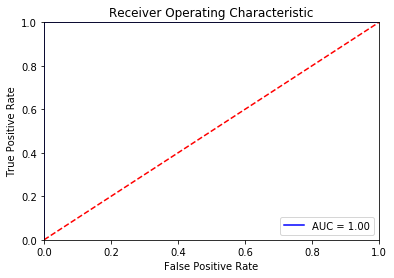

In [123]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [124]:
pred = clf.predict_proba (X_test) [:,1]

In [125]:
pred = pd.DataFrame(pred)

In [126]:
pred.head()

,0
0,0.370
1,0.275
2,0.320
3,0.235
4,0.225


## XG Boost Classifier

In [127]:
from xgboost import XGBClassifier

C:\Users\Admin\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [128]:
# fit model no training data
model = XGBClassifier(objective="binary:logistic",booster='gbtree', n_estimators = 500,reg_alpha=2 )
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=2, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [129]:
# Predicting trained values

In [130]:
y_train_pred = model.predict_proba(X_train)

In [131]:
# Predicting y values for test dataset

In [132]:
y_pred = model.predict_proba(X_test)

In [133]:
y_pred

array([[0.7606578 , 0.23934223],
       [0.8222906 , 0.17770942],
       [0.6915203 , 0.30847973],
       ...,
       [0.9934732 , 0.00652681],
       [0.8319167 , 0.16808333],
       [0.8902718 , 0.1097282 ]], dtype=float32)

In [134]:
pred = pd.DataFrame(y_pred)

In [135]:
from sklearn import metrics

In [136]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)

In [137]:
# ROC curve

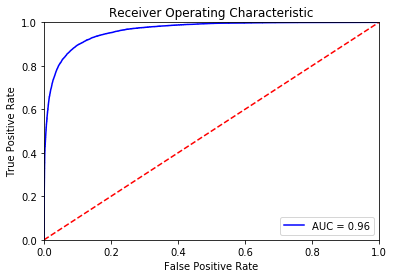

In [138]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [139]:
pred = model.predict_proba (X_test) [:,1]

In [140]:
pred = pd.DataFrame(pred)

In [141]:
pred.head()

,0
0,0.239342
1,0.177709
2,0.308480
3,0.129555
4,0.057726


## Hyperparameter tuning of XGBoost Classifier

In [142]:
clf = XGBClassifier(objective="binary:logistic")

In [143]:
booster=['gbtree']
base_score=[0.3, 0.5]

In [144]:
n_estimators = [200, 300]
max_depth = [4, 5]
learning_rate=[0.1,0.2]

In [145]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'booster':booster,
    'base_score':base_score
    }

In [146]:
from sklearn.model_selection import RandomizedSearchCV

In [147]:
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc

# define scoring function 
def custom_auc(ground_truth, predictions):
     fpr, tpr, _ = roc_curve(ground_truth, predictions[:,1], pos_label=1)    
     return auc(fpr, tpr)

# to be standart sklearn's scorer        
my_auc = make_scorer(custom_auc, greater_is_better=True, needs_proba=True)


In [148]:
# Set up the random search with 3-fold cross validation
random_cv = RandomizedSearchCV(estimator=clf,
            param_distributions=hyperparameter_grid,
            cv=3, n_iter=10,
            scoring = 'roc_auc',n_jobs = 3,
            verbose = 5, 
            return_train_score = True,
            random_state=24)

In [149]:
random_cv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  2.2min
[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed:  4.8min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [150]:
random_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [151]:
classifier = XGBClassifier(base_score=0.6, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1.5, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=1.5, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='auto', validate_parameters=1, verbosity=None)

In [152]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.6, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1.5, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=1.5, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='auto', validate_parameters=1, verbosity=None)

In [153]:
# Predicting trained values

In [154]:
y_train_pred = classifier.predict_proba(X_train)

In [155]:
# Predicting y values for test dataset

In [156]:
y_pred = classifier.predict_proba(X_test)

In [157]:
y_pred

array([[0.67442775, 0.32557225],
       [0.71749175, 0.28250828],
       [0.73893154, 0.26106846],
       ...,
       [0.99329007, 0.00670995],
       [0.7674576 , 0.2325424 ],
       [0.8838305 , 0.11616949]], dtype=float32)

In [158]:
pred = pd.DataFrame(y_pred)

In [159]:
from sklearn import metrics

In [160]:
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)

In [161]:
# ROC curve

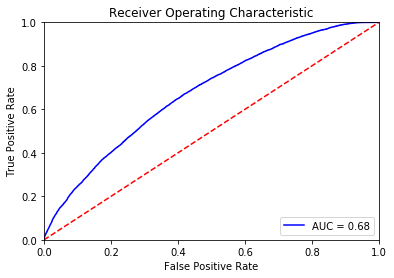

In [162]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [163]:
pred = classifier.predict_proba (X_test) [:,1]

In [164]:
pred = pd.DataFrame(pred)

In [165]:
pred.head(10)

,0
0,0.325572
1,0.282508
2,0.261068
3,0.201697
4,0.213367
5,0.204824
6,0.271225
7,0.318242
8,0.317681
9,0.366897


## CatBoost model

In [167]:
!pip install catboost

In [168]:
from catboost import CatBoostClassifier

In [203]:
model = CatBoostClassifier(n_estimators=3000, 
                           learning_rate=0.05,
                           depth=3,eval_metric='AUC')

In [204]:
model.fit(X_train, y_train)

0:	total: 15.4ms	remaining: 46.3s
1:	total: 33.6ms	remaining: 50.4s
2:	total: 50.6ms	remaining: 50.5s
3:	total: 64.1ms	remaining: 48s
4:	total: 79.2ms	remaining: 47.5s
5:	total: 96.1ms	remaining: 47.9s
6:	total: 110ms	remaining: 47.2s
7:	total: 128ms	remaining: 47.8s
8:	total: 142ms	remaining: 47.2s
9:	total: 159ms	remaining: 47.6s
10:	total: 173ms	remaining: 47.1s
11:	total: 189ms	remaining: 47s
12:	total: 206ms	remaining: 47.3s
13:	total: 227ms	remaining: 48.4s
14:	total: 244ms	remaining: 48.6s
15:	total: 264ms	remaining: 49.3s
16:	total: 283ms	remaining: 49.7s
17:	total: 306ms	remaining: 50.7s
18:	total: 321ms	remaining: 50.4s
19:	total: 336ms	remaining: 50.1s
20:	total: 351ms	remaining: 49.8s
21:	total: 374ms	remaining: 50.6s
22:	total: 388ms	remaining: 50.3s
23:	total: 407ms	remaining: 50.5s
24:	total: 423ms	remaining: 50.3s
25:	total: 438ms	remaining: 50.1s
26:	total: 452ms	remaining: 49.8s
27:	total: 467ms	remaining: 49.6s
28:	total: 485ms	remaining: 49.7s
29:	total: 500ms	remai

247:	total: 4.26s	remaining: 47.3s
248:	total: 4.29s	remaining: 47.4s
249:	total: 4.31s	remaining: 47.4s
250:	total: 4.33s	remaining: 47.4s
251:	total: 4.34s	remaining: 47.4s
252:	total: 4.37s	remaining: 47.4s
253:	total: 4.38s	remaining: 47.4s
254:	total: 4.41s	remaining: 47.5s
255:	total: 4.43s	remaining: 47.5s
256:	total: 4.45s	remaining: 47.5s
257:	total: 4.47s	remaining: 47.5s
258:	total: 4.49s	remaining: 47.5s
259:	total: 4.5s	remaining: 47.4s
260:	total: 4.52s	remaining: 47.5s
261:	total: 4.54s	remaining: 47.5s
262:	total: 4.56s	remaining: 47.5s
263:	total: 4.58s	remaining: 47.5s
264:	total: 4.61s	remaining: 47.5s
265:	total: 4.63s	remaining: 47.6s
266:	total: 4.65s	remaining: 47.6s
267:	total: 4.68s	remaining: 47.7s
268:	total: 4.7s	remaining: 47.7s
269:	total: 4.72s	remaining: 47.8s
270:	total: 4.74s	remaining: 47.7s
271:	total: 4.76s	remaining: 47.8s
272:	total: 4.78s	remaining: 47.7s
273:	total: 4.8s	remaining: 47.7s
274:	total: 4.81s	remaining: 47.7s
275:	total: 4.83s	remai

486:	total: 8.75s	remaining: 45.2s
487:	total: 8.77s	remaining: 45.1s
488:	total: 8.79s	remaining: 45.1s
489:	total: 8.8s	remaining: 45.1s
490:	total: 8.81s	remaining: 45s
491:	total: 8.84s	remaining: 45s
492:	total: 8.86s	remaining: 45s
493:	total: 8.87s	remaining: 45s
494:	total: 8.89s	remaining: 45s
495:	total: 8.9s	remaining: 44.9s
496:	total: 8.92s	remaining: 44.9s
497:	total: 8.94s	remaining: 44.9s
498:	total: 8.96s	remaining: 44.9s
499:	total: 8.98s	remaining: 44.9s
500:	total: 9s	remaining: 44.9s
501:	total: 9.01s	remaining: 44.9s
502:	total: 9.03s	remaining: 44.8s
503:	total: 9.05s	remaining: 44.8s
504:	total: 9.06s	remaining: 44.8s
505:	total: 9.08s	remaining: 44.7s
506:	total: 9.09s	remaining: 44.7s
507:	total: 9.11s	remaining: 44.7s
508:	total: 9.13s	remaining: 44.7s
509:	total: 9.14s	remaining: 44.7s
510:	total: 9.16s	remaining: 44.6s
511:	total: 9.18s	remaining: 44.6s
512:	total: 9.2s	remaining: 44.6s
513:	total: 9.22s	remaining: 44.6s
514:	total: 9.24s	remaining: 44.6s
5

727:	total: 13.8s	remaining: 43s
728:	total: 13.8s	remaining: 43s
729:	total: 13.8s	remaining: 43s
730:	total: 13.8s	remaining: 42.9s
731:	total: 13.8s	remaining: 42.9s
732:	total: 13.9s	remaining: 42.9s
733:	total: 13.9s	remaining: 42.9s
734:	total: 13.9s	remaining: 42.8s
735:	total: 13.9s	remaining: 42.8s
736:	total: 13.9s	remaining: 42.8s
737:	total: 14s	remaining: 42.8s
738:	total: 14s	remaining: 42.8s
739:	total: 14s	remaining: 42.7s
740:	total: 14s	remaining: 42.7s
741:	total: 14s	remaining: 42.7s
742:	total: 14s	remaining: 42.7s
743:	total: 14.1s	remaining: 42.7s
744:	total: 14.1s	remaining: 42.6s
745:	total: 14.1s	remaining: 42.6s
746:	total: 14.1s	remaining: 42.6s
747:	total: 14.1s	remaining: 42.6s
748:	total: 14.2s	remaining: 42.6s
749:	total: 14.2s	remaining: 42.5s
750:	total: 14.2s	remaining: 42.5s
751:	total: 14.2s	remaining: 42.5s
752:	total: 14.2s	remaining: 42.5s
753:	total: 14.3s	remaining: 42.5s
754:	total: 14.3s	remaining: 42.4s
755:	total: 14.3s	remaining: 42.4s
756

965:	total: 18.3s	remaining: 38.6s
966:	total: 18.4s	remaining: 38.6s
967:	total: 18.4s	remaining: 38.6s
968:	total: 18.4s	remaining: 38.5s
969:	total: 18.4s	remaining: 38.5s
970:	total: 18.4s	remaining: 38.5s
971:	total: 18.4s	remaining: 38.5s
972:	total: 18.5s	remaining: 38.5s
973:	total: 18.5s	remaining: 38.5s
974:	total: 18.5s	remaining: 38.4s
975:	total: 18.5s	remaining: 38.4s
976:	total: 18.6s	remaining: 38.4s
977:	total: 18.6s	remaining: 38.4s
978:	total: 18.6s	remaining: 38.4s
979:	total: 18.6s	remaining: 38.4s
980:	total: 18.7s	remaining: 38.4s
981:	total: 18.7s	remaining: 38.4s
982:	total: 18.7s	remaining: 38.4s
983:	total: 18.7s	remaining: 38.4s
984:	total: 18.7s	remaining: 38.3s
985:	total: 18.8s	remaining: 38.3s
986:	total: 18.8s	remaining: 38.3s
987:	total: 18.8s	remaining: 38.3s
988:	total: 18.8s	remaining: 38.3s
989:	total: 18.8s	remaining: 38.2s
990:	total: 18.9s	remaining: 38.2s
991:	total: 18.9s	remaining: 38.2s
992:	total: 18.9s	remaining: 38.2s
993:	total: 18.9s	re

1203:	total: 22.6s	remaining: 33.7s
1204:	total: 22.6s	remaining: 33.7s
1205:	total: 22.6s	remaining: 33.6s
1206:	total: 22.6s	remaining: 33.6s
1207:	total: 22.6s	remaining: 33.6s
1208:	total: 22.7s	remaining: 33.6s
1209:	total: 22.7s	remaining: 33.6s
1210:	total: 22.7s	remaining: 33.5s
1211:	total: 22.7s	remaining: 33.5s
1212:	total: 22.7s	remaining: 33.5s
1213:	total: 22.7s	remaining: 33.5s
1214:	total: 22.8s	remaining: 33.4s
1215:	total: 22.8s	remaining: 33.4s
1216:	total: 22.8s	remaining: 33.4s
1217:	total: 22.8s	remaining: 33.4s
1218:	total: 22.8s	remaining: 33.4s
1219:	total: 22.8s	remaining: 33.3s
1220:	total: 22.9s	remaining: 33.3s
1221:	total: 22.9s	remaining: 33.3s
1222:	total: 22.9s	remaining: 33.3s
1223:	total: 22.9s	remaining: 33.2s
1224:	total: 22.9s	remaining: 33.2s
1225:	total: 22.9s	remaining: 33.2s
1226:	total: 23s	remaining: 33.2s
1227:	total: 23s	remaining: 33.1s
1228:	total: 23s	remaining: 33.1s
1229:	total: 23s	remaining: 33.1s
1230:	total: 23s	remaining: 33.1s
12

1443:	total: 26.6s	remaining: 28.6s
1444:	total: 26.6s	remaining: 28.6s
1445:	total: 26.6s	remaining: 28.6s
1446:	total: 26.6s	remaining: 28.6s
1447:	total: 26.6s	remaining: 28.5s
1448:	total: 26.7s	remaining: 28.5s
1449:	total: 26.7s	remaining: 28.5s
1450:	total: 26.7s	remaining: 28.5s
1451:	total: 26.7s	remaining: 28.5s
1452:	total: 26.7s	remaining: 28.5s
1453:	total: 26.8s	remaining: 28.4s
1454:	total: 26.8s	remaining: 28.4s
1455:	total: 26.8s	remaining: 28.4s
1456:	total: 26.8s	remaining: 28.4s
1457:	total: 26.8s	remaining: 28.4s
1458:	total: 26.8s	remaining: 28.3s
1459:	total: 26.8s	remaining: 28.3s
1460:	total: 26.9s	remaining: 28.3s
1461:	total: 26.9s	remaining: 28.3s
1462:	total: 26.9s	remaining: 28.3s
1463:	total: 26.9s	remaining: 28.2s
1464:	total: 26.9s	remaining: 28.2s
1465:	total: 27s	remaining: 28.2s
1466:	total: 27s	remaining: 28.2s
1467:	total: 27s	remaining: 28.2s
1468:	total: 27s	remaining: 28.1s
1469:	total: 27s	remaining: 28.1s
1470:	total: 27s	remaining: 28.1s
1471

1678:	total: 30.9s	remaining: 24.3s
1679:	total: 30.9s	remaining: 24.3s
1680:	total: 30.9s	remaining: 24.2s
1681:	total: 30.9s	remaining: 24.2s
1682:	total: 30.9s	remaining: 24.2s
1683:	total: 31s	remaining: 24.2s
1684:	total: 31s	remaining: 24.2s
1685:	total: 31s	remaining: 24.1s
1686:	total: 31s	remaining: 24.1s
1687:	total: 31s	remaining: 24.1s
1688:	total: 31s	remaining: 24.1s
1689:	total: 31.1s	remaining: 24.1s
1690:	total: 31.1s	remaining: 24.1s
1691:	total: 31.1s	remaining: 24s
1692:	total: 31.1s	remaining: 24s
1693:	total: 31.1s	remaining: 24s
1694:	total: 31.2s	remaining: 24s
1695:	total: 31.2s	remaining: 24s
1696:	total: 31.2s	remaining: 24s
1697:	total: 31.2s	remaining: 23.9s
1698:	total: 31.2s	remaining: 23.9s
1699:	total: 31.2s	remaining: 23.9s
1700:	total: 31.3s	remaining: 23.9s
1701:	total: 31.3s	remaining: 23.9s
1702:	total: 31.3s	remaining: 23.8s
1703:	total: 31.3s	remaining: 23.8s
1704:	total: 31.3s	remaining: 23.8s
1705:	total: 31.4s	remaining: 23.8s
1706:	total: 31.

1919:	total: 35.1s	remaining: 19.7s
1920:	total: 35.1s	remaining: 19.7s
1921:	total: 35.1s	remaining: 19.7s
1922:	total: 35.1s	remaining: 19.7s
1923:	total: 35.1s	remaining: 19.7s
1924:	total: 35.2s	remaining: 19.6s
1925:	total: 35.2s	remaining: 19.6s
1926:	total: 35.2s	remaining: 19.6s
1927:	total: 35.2s	remaining: 19.6s
1928:	total: 35.2s	remaining: 19.6s
1929:	total: 35.2s	remaining: 19.5s
1930:	total: 35.3s	remaining: 19.5s
1931:	total: 35.3s	remaining: 19.5s
1932:	total: 35.3s	remaining: 19.5s
1933:	total: 35.3s	remaining: 19.5s
1934:	total: 35.3s	remaining: 19.5s
1935:	total: 35.4s	remaining: 19.4s
1936:	total: 35.4s	remaining: 19.4s
1937:	total: 35.4s	remaining: 19.4s
1938:	total: 35.4s	remaining: 19.4s
1939:	total: 35.4s	remaining: 19.4s
1940:	total: 35.4s	remaining: 19.3s
1941:	total: 35.5s	remaining: 19.3s
1942:	total: 35.5s	remaining: 19.3s
1943:	total: 35.5s	remaining: 19.3s
1944:	total: 35.5s	remaining: 19.3s
1945:	total: 35.5s	remaining: 19.2s
1946:	total: 35.6s	remaining

2155:	total: 39.3s	remaining: 15.4s
2156:	total: 39.3s	remaining: 15.4s
2157:	total: 39.3s	remaining: 15.3s
2158:	total: 39.3s	remaining: 15.3s
2159:	total: 39.3s	remaining: 15.3s
2160:	total: 39.4s	remaining: 15.3s
2161:	total: 39.4s	remaining: 15.3s
2162:	total: 39.4s	remaining: 15.2s
2163:	total: 39.4s	remaining: 15.2s
2164:	total: 39.4s	remaining: 15.2s
2165:	total: 39.5s	remaining: 15.2s
2166:	total: 39.5s	remaining: 15.2s
2167:	total: 39.5s	remaining: 15.2s
2168:	total: 39.5s	remaining: 15.1s
2169:	total: 39.5s	remaining: 15.1s
2170:	total: 39.5s	remaining: 15.1s
2171:	total: 39.6s	remaining: 15.1s
2172:	total: 39.6s	remaining: 15.1s
2173:	total: 39.6s	remaining: 15s
2174:	total: 39.6s	remaining: 15s
2175:	total: 39.6s	remaining: 15s
2176:	total: 39.6s	remaining: 15s
2177:	total: 39.7s	remaining: 15s
2178:	total: 39.7s	remaining: 14.9s
2179:	total: 39.7s	remaining: 14.9s
2180:	total: 39.7s	remaining: 14.9s
2181:	total: 39.7s	remaining: 14.9s
2182:	total: 39.7s	remaining: 14.9s
21

2396:	total: 43.5s	remaining: 10.9s
2397:	total: 43.5s	remaining: 10.9s
2398:	total: 43.5s	remaining: 10.9s
2399:	total: 43.6s	remaining: 10.9s
2400:	total: 43.6s	remaining: 10.9s
2401:	total: 43.6s	remaining: 10.9s
2402:	total: 43.6s	remaining: 10.8s
2403:	total: 43.6s	remaining: 10.8s
2404:	total: 43.6s	remaining: 10.8s
2405:	total: 43.7s	remaining: 10.8s
2406:	total: 43.7s	remaining: 10.8s
2407:	total: 43.7s	remaining: 10.7s
2408:	total: 43.7s	remaining: 10.7s
2409:	total: 43.7s	remaining: 10.7s
2410:	total: 43.7s	remaining: 10.7s
2411:	total: 43.8s	remaining: 10.7s
2412:	total: 43.8s	remaining: 10.6s
2413:	total: 43.8s	remaining: 10.6s
2414:	total: 43.8s	remaining: 10.6s
2415:	total: 43.8s	remaining: 10.6s
2416:	total: 43.8s	remaining: 10.6s
2417:	total: 43.9s	remaining: 10.6s
2418:	total: 43.9s	remaining: 10.5s
2419:	total: 43.9s	remaining: 10.5s
2420:	total: 43.9s	remaining: 10.5s
2421:	total: 43.9s	remaining: 10.5s
2422:	total: 44s	remaining: 10.5s
2423:	total: 44s	remaining: 10

2627:	total: 48.1s	remaining: 6.81s
2628:	total: 48.1s	remaining: 6.79s
2629:	total: 48.2s	remaining: 6.77s
2630:	total: 48.2s	remaining: 6.76s
2631:	total: 48.2s	remaining: 6.74s
2632:	total: 48.2s	remaining: 6.72s
2633:	total: 48.2s	remaining: 6.7s
2634:	total: 48.3s	remaining: 6.68s
2635:	total: 48.3s	remaining: 6.67s
2636:	total: 48.3s	remaining: 6.65s
2637:	total: 48.3s	remaining: 6.63s
2638:	total: 48.3s	remaining: 6.61s
2639:	total: 48.4s	remaining: 6.59s
2640:	total: 48.4s	remaining: 6.58s
2641:	total: 48.4s	remaining: 6.56s
2642:	total: 48.4s	remaining: 6.54s
2643:	total: 48.4s	remaining: 6.52s
2644:	total: 48.4s	remaining: 6.5s
2645:	total: 48.5s	remaining: 6.48s
2646:	total: 48.5s	remaining: 6.46s
2647:	total: 48.5s	remaining: 6.45s
2648:	total: 48.5s	remaining: 6.43s
2649:	total: 48.5s	remaining: 6.41s
2650:	total: 48.5s	remaining: 6.39s
2651:	total: 48.6s	remaining: 6.37s
2652:	total: 48.6s	remaining: 6.35s
2653:	total: 48.6s	remaining: 6.34s
2654:	total: 48.6s	remaining: 

2858:	total: 52.7s	remaining: 2.6s
2859:	total: 52.8s	remaining: 2.58s
2860:	total: 52.8s	remaining: 2.56s
2861:	total: 52.8s	remaining: 2.55s
2862:	total: 52.8s	remaining: 2.53s
2863:	total: 52.9s	remaining: 2.51s
2864:	total: 52.9s	remaining: 2.49s
2865:	total: 52.9s	remaining: 2.47s
2866:	total: 52.9s	remaining: 2.46s
2867:	total: 53s	remaining: 2.44s
2868:	total: 53s	remaining: 2.42s
2869:	total: 53s	remaining: 2.4s
2870:	total: 53s	remaining: 2.38s
2871:	total: 53.1s	remaining: 2.36s
2872:	total: 53.1s	remaining: 2.35s
2873:	total: 53.1s	remaining: 2.33s
2874:	total: 53.1s	remaining: 2.31s
2875:	total: 53.2s	remaining: 2.29s
2876:	total: 53.2s	remaining: 2.27s
2877:	total: 53.2s	remaining: 2.25s
2878:	total: 53.2s	remaining: 2.24s
2879:	total: 53.2s	remaining: 2.22s
2880:	total: 53.3s	remaining: 2.2s
2881:	total: 53.3s	remaining: 2.18s
2882:	total: 53.3s	remaining: 2.16s
2883:	total: 53.4s	remaining: 2.15s
2884:	total: 53.4s	remaining: 2.13s
2885:	total: 53.4s	remaining: 2.11s
288

In [205]:
# Predicting trained values

In [206]:
y_train_pred = model.predict_proba(X_train)

In [207]:
# Predicting y values for test dataset

In [208]:
y_pred = model.predict_proba(X_test)

In [209]:
y_pred

array([[0.67475715, 0.32524285],
       [0.70146549, 0.29853451],
       [0.73795701, 0.26204299],
       ...,
       [0.98587564, 0.01412436],
       [0.82089199, 0.17910801],
       [0.9309173 , 0.0690827 ]])

In [210]:
pred = pd.DataFrame(y_pred)

In [211]:
from sklearn import metrics

In [212]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)

In [213]:
# ROC curve

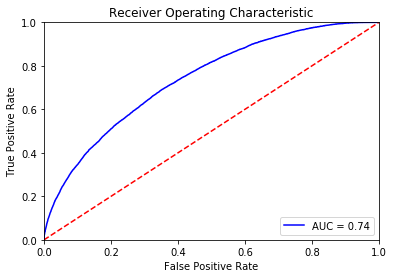

In [214]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [215]:
pred = model.predict_proba (X_test) [:,1]

In [216]:
pred = pd.DataFrame(pred)

In [217]:
pred.head()

,0
0,0.325243
1,0.298535
2,0.262043
3,0.235434
4,0.174817


## KNN model

In [158]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [159]:
neigh = KNC(n_neighbors = 3)

In [160]:
model = neigh.fit(X_train, y_train)

In [163]:
# Predicting trained values

In [164]:
y_train_pred = neigh.predict_proba(X_train)

In [165]:
# Predicting y values for test dataset

In [166]:
y_pred = neigh.predict_proba(X_test)

In [167]:
y_pred

array([[1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       ...,
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333]])

In [168]:
pred = pd.DataFrame(y_pred)

In [169]:
from sklearn import metrics

In [170]:
# calculate the fpr and tpr for all thresholds of the classification
probs = neigh.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)

In [171]:
# ROC curve

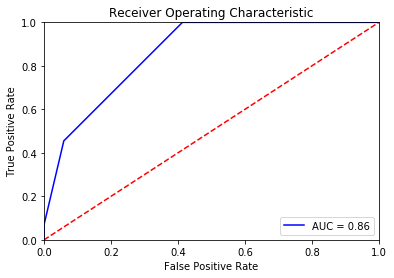

In [172]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [173]:
pred = neigh.predict_proba (X_test) [:,1]

In [174]:
pred = pd.DataFrame(pred)

In [175]:
pred.head(10)

,0
0,0.000000
1,0.666667
2,0.333333
3,0.333333
4,0.333333
5,0.333333
6,0.333333
7,0.666667
8,0.666667
9,0.000000


## Logistic Regression model

In [185]:
from sklearn.linear_model import LogisticRegression

In [258]:
classifier = LogisticRegression(max_iter=200, multi_class="ovr", solver="saga")

In [259]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, multi_class='ovr', solver='saga')

In [260]:
classifier.coef_                  # coefficients of features 

array([[ 0.08839248,  0.04972616,  0.01036666,  0.03128432, -0.00466239,
         1.00731565, -0.17332395, -0.10059562, -0.04930556, -0.01529242,
         0.16872755, -0.05358428, -0.18800336, -0.05672178,  0.04427905,
        -0.00692253,  0.15267682,  0.01240188, -0.10201144, -0.11164645,
        -0.11004191,  0.09044956,  0.06485162,  0.02809759, -0.08898209,
         0.19884868,  0.04141284,  0.08941957, -0.01722151,  0.32196861,
        -0.54163949,  0.35430649,  0.12181112,  0.34709835,  0.27904113,
        -0.67645916,  0.09008916,  0.02895374, -0.05458013,  0.01854133,
         0.02397661,  0.06862302, -0.00481488,  0.20573348, -0.15799043]])

In [261]:
classifier.predict_proba (X_train)            # Probability values 

array([[0.70509386, 0.29490614],
       [0.66516218, 0.33483782],
       [0.72111135, 0.27888865],
       ...,
       [0.79321513, 0.20678487],
       [0.73245211, 0.26754789],
       [0.74156498, 0.25843502]])

In [262]:
classifier.predict_proba (X_test) 

array([[0.84546658, 0.15453342],
       [0.73066388, 0.26933612],
       [0.75409696, 0.24590304],
       ...,
       [0.86648272, 0.13351728],
       [0.75304643, 0.24695357],
       [0.85252647, 0.14747353]])

In [263]:
pred = classifier.predict_proba (X_test) [:,1]

In [264]:
y_pred = classifier.predict(X_test)

In [265]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [266]:
pred = pd.DataFrame(pred)

In [267]:
pred.value_counts()

0.295784    2
0.401366    1
0.226739    1
0.226649    1
0.226658    1
           ..
0.268339    1
0.268341    1
0.268344    1
0.268351    1
0.080285    1
Length: 21804, dtype: int64

In [268]:
# Predicting trained values

In [269]:
y_train_pred = classifier.predict(X_train)

In [270]:
# Predicting y values for test dataset

In [271]:
confusion_matrix(y_train_pred, y_train)

array([[38673, 12209],
       [    0,     0]], dtype=int64)

In [272]:
Accuracy = accuracy_score(y_train_pred, y_train)
Accuracy

0.7600526708855784

In [273]:
from sklearn import metrics

In [274]:
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)

In [275]:
# ROC curve

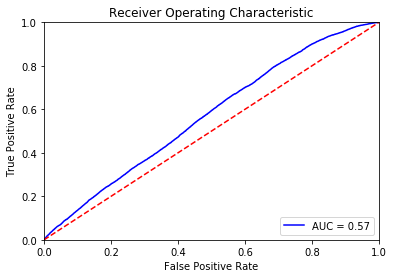

In [276]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## SVM Model

In [186]:
from sklearn.svm import SVC

In [ ]:
model_poly = SVC(kernel = "rbf", probability=True)
model_poly.fit(X_train,y_train)

In [ ]:
# Predicting trained values

In [ ]:
y_train_pred = model_poly.predict_proba(X_train)

In [ ]:
# Predicting y values for test dataset

In [ ]:
y_pred = model_poly.predict_proba(X_test)

In [ ]:
y_pred

In [ ]:
pred = pd.DataFrame(y_pred)

In [ ]:
from sklearn import metrics

In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model_poly.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)

In [ ]:
# ROC curve

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
pred = classifier.predict_proba (X_test) [:,1]

In [ ]:
pred = pd.DataFrame(pred)

In [ ]:
pred.head(10)

## Naive Bayes model

In [106]:
from sklearn.naive_bayes import MultinomialNB

In [107]:
nb_classifier = MultinomialNB()

In [108]:
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [109]:
# Predicting trained values

In [110]:
y_train_pred = nb_classifier.predict_proba(X_train)

In [111]:
# Predicting y values for test dataset

In [112]:
y_pred = nb_classifier.predict_proba(X_test)

In [113]:
y_pred

array([[0.76133514, 0.23866486],
       [0.74828935, 0.25171065],
       [0.75127807, 0.24872193],
       ...,
       [0.78550101, 0.21449899],
       [0.77273063, 0.22726937],
       [0.76998357, 0.23001643]])

In [114]:
pred = pd.DataFrame(y_pred)

In [115]:
from sklearn import metrics

In [116]:
# calculate the fpr and tpr for all thresholds of the classification
probs = nb_classifier.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)

In [117]:
# ROC curve

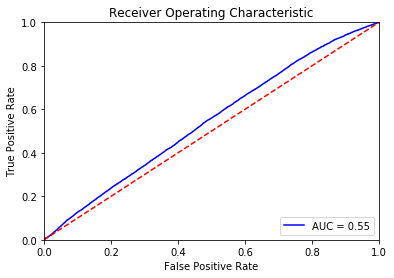

In [118]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [119]:
pred = nb_classifier.predict_proba (X_test) [:,1]

In [120]:
pred = pd.DataFrame(pred)

In [121]:
pred.head(10)

,0
0,0.238665
1,0.251711
2,0.248722
3,0.237353
4,0.232466
5,0.240681
6,0.252191
7,0.249351
8,0.245591
9,0.250687


In [122]:
### Hyperparameter tuning of Naive Bayes model

In [123]:
# Tuning the parameter 'alpha' to improve the accuracy

In [126]:
from sklearn.metrics import roc_auc_score

In [124]:
classifier=MultinomialNB(alpha=0.1)

In [128]:
previous_score=0
for alpha in np.arange(0.1,1.1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_train)
    score = roc_auc_score(y_train, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(round(alpha,1),score))

Alpha: 0.1, Score : 0.5
Alpha: 0.2, Score : 0.5
Alpha: 0.3, Score : 0.5
Alpha: 0.4, Score : 0.5
Alpha: 0.5, Score : 0.5
Alpha: 0.6, Score : 0.5
Alpha: 0.7, Score : 0.5
Alpha: 0.8, Score : 0.5
Alpha: 0.9, Score : 0.5
Alpha: 1.0, Score : 0.5


In [292]:
### Saving the predicted values along with ID and Response

In [293]:
df = pd.DataFrame(pred, columns = ['ID', 'Response'],index= None)

In [294]:
df['Response'] = pred

In [295]:
df.head()

,ID,Response
0,NaN,0.239342
1,NaN,0.177709
2,NaN,0.308480
3,NaN,0.129555
4,NaN,0.057726


In [296]:
df.shape

(21805, 2)

In [297]:
df["ID"] = range(50883,72688)

In [298]:
df.head()

,ID,Response
0,50883,0.239342
1,50884,0.177709
2,50885,0.308480
3,50886,0.129555
4,50887,0.057726


In [299]:
df.shape

(21805, 2)

In [300]:
df.to_csv('AV_health_prediction(17).csv', index = False) 